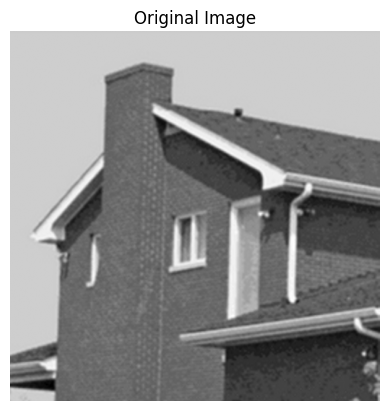

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread('/content/Grey scale Image_1.png', cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()


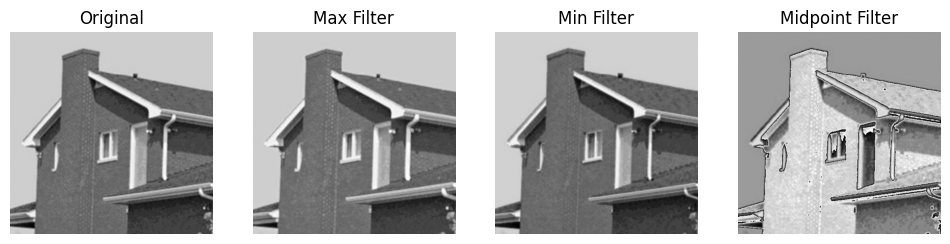

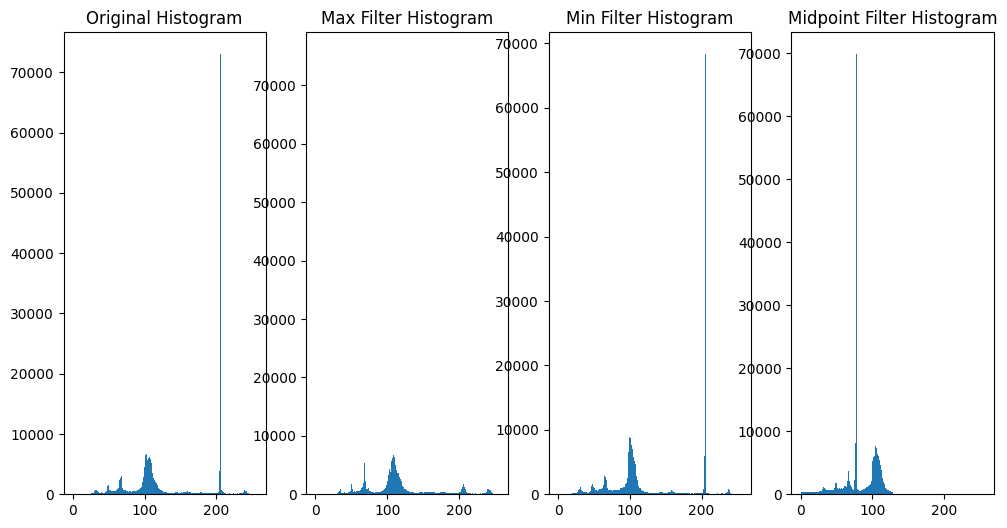

In [ ]:
# Define Kernel Size
kernel_size = 3  # 3x3 Kernel

# Apply Max Filter (Dilation)
max_filtered = cv2.dilate(image, np.ones((kernel_size, kernel_size), np.uint8))

# Apply Min Filter (Erosion)
min_filtered = cv2.erode(image, np.ones((kernel_size, kernel_size), np.uint8))

# Apply Midpoint Filter
midpoint_filtered = (max_filtered + min_filtered) // 2

# Display Filtered Images
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(max_filtered, cmap='gray')
plt.title("Max Filter")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(min_filtered, cmap='gray')
plt.title("Min Filter")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(midpoint_filtered, cmap='gray')
plt.title("Midpoint Filter")
plt.axis('off')

plt.show()

# Plot Histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.hist(image.ravel(), bins=256, range=(0, 256))
plt.title("Original Histogram")

plt.subplot(1, 4, 2)
plt.hist(max_filtered.ravel(), bins=256, range=(0, 256))
plt.title("Max Filter Histogram")

plt.subplot(1, 4, 3)
plt.hist(min_filtered.ravel(), bins=256, range=(0, 256))
plt.title("Min Filter Histogram")

plt.subplot(1, 4, 4)
plt.hist(midpoint_filtered.ravel(), bins=256, range=(0, 256))
plt.title("Midpoint Filter Histogram")

plt.show()


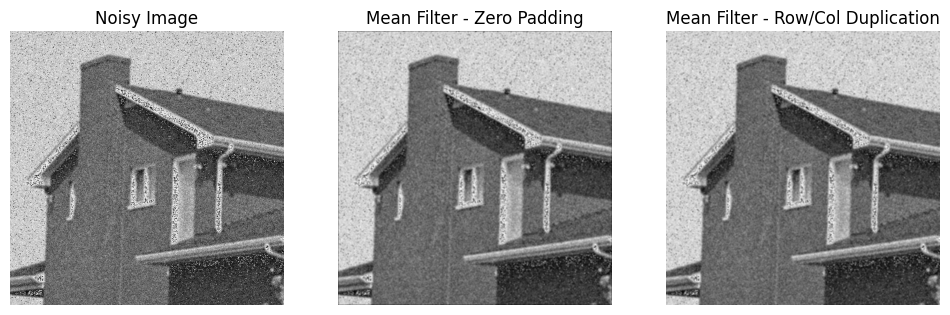

In [ ]:
# Add Noise to Image
noisy_image = image + np.random.normal(0, 25, image.shape).astype(np.uint8)

# Zero Padding
zero_padded = cv2.copyMakeBorder(noisy_image, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)
filtered_zero = cv2.blur(zero_padded, (3, 3))[1:-1, 1:-1]  # Remove padding effect

# Row and Column Duplication Padding
duplicate_padded = cv2.copyMakeBorder(noisy_image, 1, 1, 1, 1, cv2.BORDER_REPLICATE)
filtered_duplicate = cv2.blur(duplicate_padded, (3, 3))[1:-1, 1:-1]  # Remove padding effect

# Display Results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(filtered_zero, cmap='gray')
plt.title("Mean Filter - Zero Padding")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filtered_duplicate, cmap='gray')
plt.title("Mean Filter - Row/Col Duplication")
plt.axis('off')

plt.show()


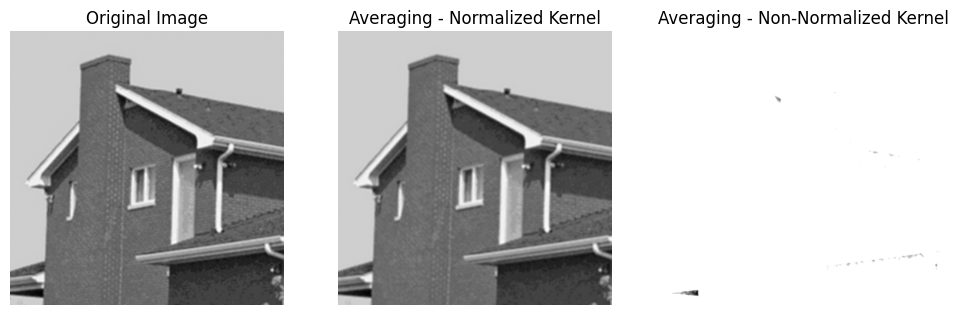

In [ ]:
# Normalized Kernel
normalized_kernel = np.ones((3, 3), np.float32) / 9
image_avg_normalized = cv2.filter2D(image, -1, normalized_kernel)

# Non-Normalized Kernel
non_normalized_kernel = np.ones((3, 3), np.float32)
image_avg_non_normalized = cv2.filter2D(image, -1, non_normalized_kernel)

# Display Results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image_avg_normalized, cmap='gray')
plt.title("Averaging - Normalized Kernel")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(image_avg_non_normalized, cmap='gray')
plt.title("Averaging - Non-Normalized Kernel")
plt.axis('off')

plt.show()


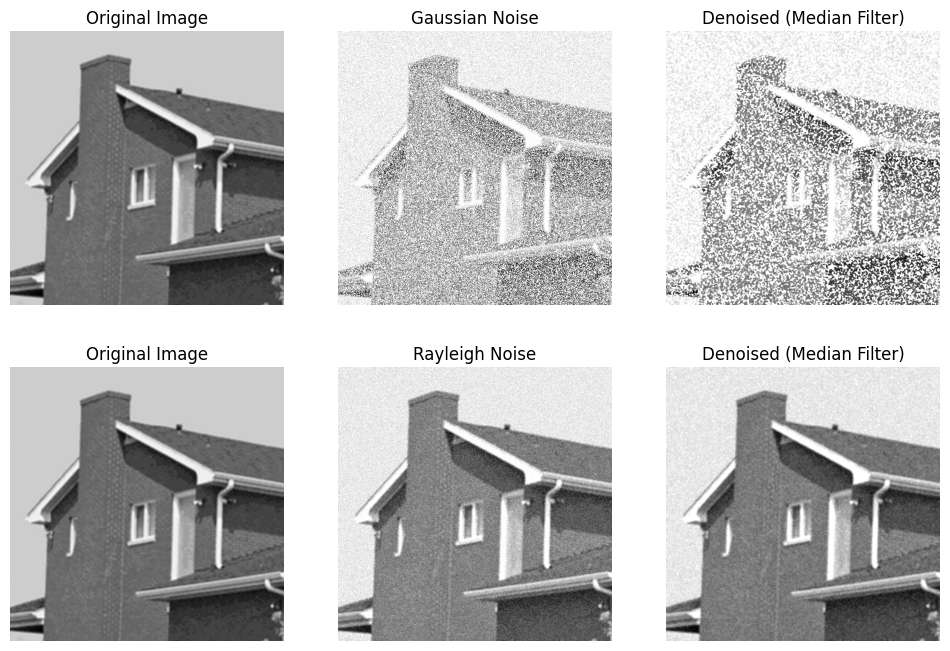

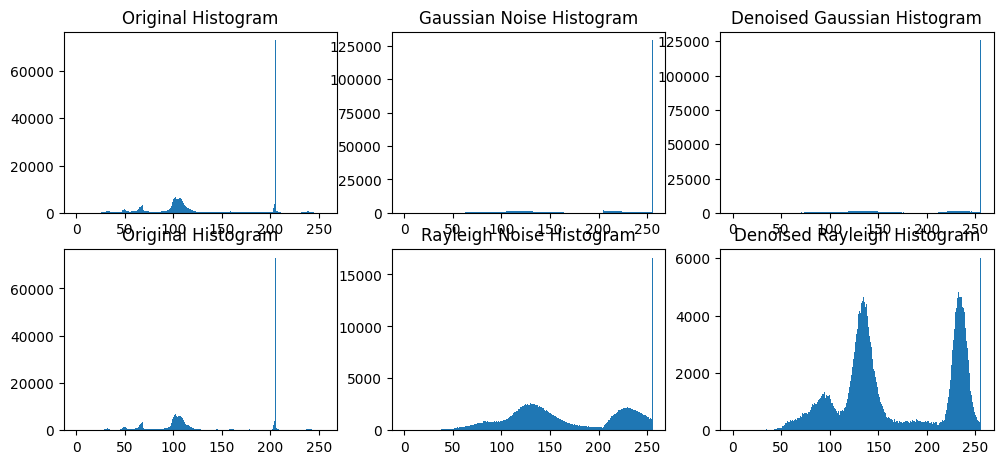

In [ ]:
# Add Gaussian Noise
gaussian_noise = np.random.normal(0, 25, image.shape).astype(np.uint8)
noisy_gaussian = cv2.add(image, gaussian_noise)

# Add Rayleigh Noise
rayleigh_noise = np.random.rayleigh(25, image.shape).astype(np.uint8)
noisy_rayleigh = cv2.add(image, rayleigh_noise)

# Apply Median Filter
denoised_gaussian = cv2.medianBlur(noisy_gaussian, 3)
denoised_rayleigh = cv2.medianBlur(noisy_rayleigh, 3)

# Display Noisy & Denoised Images
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(noisy_gaussian, cmap='gray')
plt.title("Gaussian Noise")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(denoised_gaussian, cmap='gray')
plt.title("Denoised (Median Filter)")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(noisy_rayleigh, cmap='gray')
plt.title("Rayleigh Noise")
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(denoised_rayleigh, cmap='gray')
plt.title("Denoised (Median Filter)")
plt.axis('off')

plt.show()

# Plot Histograms
plt.figure(figsize=(12, 8))

plt.subplot(3, 3, 1)
plt.hist(image.ravel(), bins=256, range=(0, 256))
plt.title("Original Histogram")

plt.subplot(3, 3, 2)
plt.hist(noisy_gaussian.ravel(), bins=256, range=(0, 256))
plt.title("Gaussian Noise Histogram")

plt.subplot(3, 3, 3)
plt.hist(denoised_gaussian.ravel(), bins=256, range=(0, 256))
plt.title("Denoised Gaussian Histogram")

plt.subplot(3, 3, 4)
plt.hist(image.ravel(), bins=256, range=(0, 256))
plt.title("Original Histogram")

plt.subplot(3, 3, 5)
plt.hist(noisy_rayleigh.ravel(), bins=256, range=(0, 256))
plt.title("Rayleigh Noise Histogram")

plt.subplot(3, 3, 6)
plt.hist(denoised_rayleigh.ravel(), bins=256, range=(0, 256))
plt.title("Denoised Rayleigh Histogram")

plt.show()
